In [1]:
import matplotlib.pyplot as plt
import os
import json

In [2]:
def find_json_file(root_folder):
    json_file_path = None
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.json'):
                if json_file_path is not None:
                    raise Exception("More than one JSON file found.", root_folder)
                json_file_path = os.path.join(root, file)
    if json_file_path is None:
        raise FileNotFoundError(f"No JSON file found: {root_folder}")
    return json_file_path

def read_json_file(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def get_task_accuracies(data, tasks):
    accuracies = {}
    results = data.get("results", {})
    for task in tasks:
        task_data = results.get(task)
        if task_data:
            acc = task_data.get("acc,none")
            if acc is not None:
                accuracies[task] = acc
            else:
                print(f"'acc,none' key not found for '{task}'.")
        else:
            print(f"Task '{task}' not found in results.")
    return accuracies, 100 * sum(accuracies.values()) / len(accuracies.keys())

In [3]:
model_mappings_135m = {}
epochs = [575, 1150, 1725, 2300, 2875]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['yes', 'no']
entropies = ['yes', 'no']
betas = [0.01, 0.05, 0.1, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"135m-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_smollm2-135M-orca_bin_ultra-offline-dpo-beta_{beta}-lr_0.0005-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_smollm2-135M-orca_bin_ultra-offline-simpo-beta_{beta}-lr_0.0001-gamma-to-beta_1.6-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_smollm2-135M-orca_bin_ultra-offline-mmpo-beta_{beta}-lr_0.0005-reward_eps_0.9-avg_logps_{len_norm}-v4-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_135m[model_key] = model_value

model_mappings_135m['135-sft']  = 'lm_harness_output_smollm2_135M_sft_checkpoint-14378'

In [4]:
model_mappings_360m = {}
epochs = [575, 1150, 1725, 2300, 2875]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['yes', 'no']
entropies = ['yes', 'no']
betas = [0.01, 0.05, 0.1, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"360m-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_smollm2-360M-orca_bin_ultra-offline-dpo-beta_{beta}-lr_0.00005-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_smollm2-360M-orca_bin_ultra-offline-simpo-beta_{beta}-lr_0.0001-gamma-to-beta_1.6-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_smollm2-360M-orca_bin_ultra-offline-mmpo-beta_{beta}-lr_0.0005-reward_eps_0.9-avg_logps_{len_norm}-v4-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_360m[model_key] = model_value

model_mappings_360m['360-sft'] = 'lm_harness_output_smollm2_360M_sft_checkpoint-28758'

In [5]:
model_mappings_llama_1b = {}
epochs = [1530, 3060, 4590, 6120, 7650]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['yes', 'no']
entropies = ['yes', 'no']
betas = [0.01, 0.05, 0.1, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"llama3.2_1b-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_llama3.2-1b-offline-dpo-beta_{beta}-lr_0.0005-avg_logps_{len_norm}-v13_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_llama3.2-1b-offline-simpo-beta_{beta}-lr_0.0005-gamma-to-beta_1.0-avg_logps_{len_norm}-v13_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_llama3.2-1b-offline-mmpo-beta_{beta}-lr_0.0005-reward_eps_0.9-avg_logps_{len_norm}-v13-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_llama_1b[model_key] = model_value

model_mappings_llama_1b['llama3.2-sft'] = 'lm_harness_output_llama3.2-1b-sftdatasetv3-sft-checkpoint-111000'

In [6]:
model_mappings_llama_8b = {}
epochs = [1530, 3060, 4590, 6120, 7650]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['no']
entropies = ['no']
betas = [0.01, 0.05, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"llama3_8b-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_llama3-8b-offline-dpo-beta_{beta}-lr_0.00001-avg_logps_{len_norm}-v1_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_llama3-8b-offline-simpo-beta_{beta}-lr_0.0001-gamma-to-beta_1.0-avg_logps_{len_norm}-v1_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_llama3-8b-offline-mmpo-beta_{beta}-lr_0.0001-reward_eps_0.9-avg_logps_{len_norm}-v1-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_llama_8b[model_key] = model_value

model_mappings_llama_8b['llama3-8b'] = 'lm_harness_output_Llama-3-Base-8B-SFT'

In [7]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/v4-runs"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [8]:
model_lm_harness_avg_scores_360m = {}
for model_id, model_file in model_mappings_360m.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_360m[model_id] = avg

In [9]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/v4-runs"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [10]:
model_lm_harness_avg_scores_135m = {}
for model_id, model_file in model_mappings_135m.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_135m[model_id] = avg

In [11]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/llama3.2-v13"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [12]:
model_lm_harness_avg_scores_llama_1b = {}
for model_id, model_file in model_mappings_llama_1b.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_llama_1b[model_id] = avg

In [13]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/llama-3-8b"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [14]:
model_lm_harness_avg_scores_llama_8b = {}
for model_id, model_file in model_mappings_llama_8b.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_llama_8b[model_id] = avg

In [15]:
alpaca_eval_root_path = "/home/saeednjf/alpaca_eval/aug11_complete_eval_log"

In [17]:
alpaca_eval_root_path_360m = alpaca_eval_root_path + "/360m"
model_alpacaeval_winrates_360m = {}
model_alpacaeval_lens_360m = {}
for model_id, model_file in model_mappings_360m.items():
    if "_sft_" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_360m}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_360m[model_id] = float(avg_length)
    model_alpacaeval_winrates_360m[model_id] = float(length_controlled_winrate)

In [18]:
alpaca_eval_root_path_135m = alpaca_eval_root_path + "/135m"
model_alpacaeval_winrates_135m = {}
model_alpacaeval_lens_135m = {}
for model_id, model_file in model_mappings_135m.items():
    if "_sft_" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_135m}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_135m[model_id] = float(avg_length)
    model_alpacaeval_winrates_135m[model_id] = float(length_controlled_winrate)

In [19]:
alpaca_eval_root_path_llama31b = alpaca_eval_root_path + "/llama3.2-1b"
model_alpacaeval_winrates_llama31b = {}
model_alpacaeval_lens_llama31b = {}
for model_id, model_file in model_mappings_llama_1b.items():
    if "-sft-" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_llama31b}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_llama31b[model_id] = float(avg_length)
    model_alpacaeval_winrates_llama31b[model_id] = float(length_controlled_winrate)

In [20]:
alpaca_eval_root_path_llama38b = alpaca_eval_root_path + "/llama3-8b"
model_alpacaeval_winrates_llama38b = {}
model_alpacaeval_lens_llama38b = {}
for model_id, model_file in model_mappings_llama_8b.items():
    if "-SFT" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_llama38b}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_llama38b[model_id] = float(avg_length)
    model_alpacaeval_winrates_llama38b[model_id] = float(length_controlled_winrate)

In [28]:
def model_vars(model_str):
    if "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"mmpo-len=0.05": "brown",
"mmpo-ent=0.05": "red",
"mmpo-len-ent=0.05": "lightsalmon",
"sft": "green"
}

def fix_labels(model, beta):
    if "mmpo-len-ent" in model.lower():
        model_label = f"MMPO + LengthNorm + EntropyOptim | β={beta}"
        label = model_label
    elif "mmpo-len" in model.lower():
        model_label = f"MMPO + LengthNorm | β={beta}"
        label = model_label
    elif "mmpo-ent" in model.lower():
        model_label = f"MMPO + EntropyOptim | β={beta}"
        label = model_label
    elif "mmpo" in model.lower():
        model_label = f"MMPO | β={beta}"
        label = model_label
    elif "simpo" in model.lower():
        model_label = f"SimPO | β={beta}"
        label = model_label
    elif "dpo" in model.lower():
        model_label = f"DPO | β={beta}"
        label = model_label
    return label

In [29]:
def mmpo_plot_diagram(models, file_name):
    fig, axs = plt.subplots(1, 4, figsize=(20, 6))  # 2 rows, 1 column
    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_135m:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_135m[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_135m[key])


        label = fix_labels(model, beta)
        axs[0].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[0].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )
    
    # Styling the plot
    axs[0].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[0].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[0].set_title('SmolLM2-135M')
    axs[0].grid(True)
    

    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_360m:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_360m[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_360m[key])

        label = fix_labels(model, beta)
        axs[1].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[1].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )

    # Styling the plot
    axs[1].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[1].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[1].set_title('SmolLM2-360M')
    axs[1].grid(True)


    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_1b:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_1b[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_llama31b[key])

        label = fix_labels(model, beta)
        axs[2].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[2].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )
    
    
    # Styling the plot
    axs[2].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[2].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[2].set_title('Llama3.2-1B')
    axs[2].grid(True)

    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3_8b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_8b:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_8b[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_llama38b[key])

        label = fix_labels(model, beta)
        axs[3].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type], color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[3].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )

    # Styling the plot
    axs[3].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[3].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[3].set_title('Llama3-8B')
    axs[3].grid(True)

    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(file_name, dpi=300)
    plt.show()

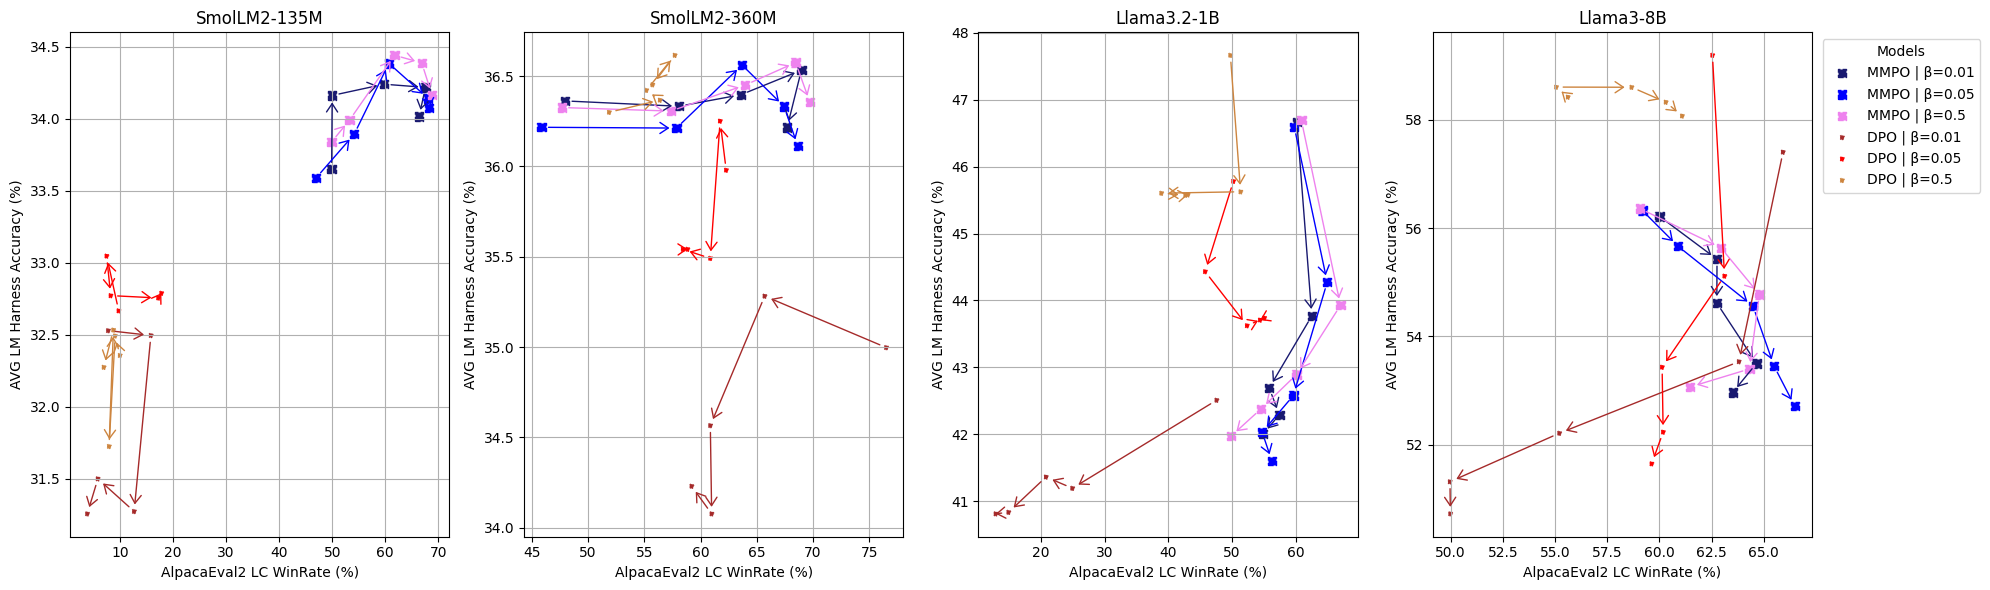

In [30]:
# Model names and markers
models = {
        # "sft": "o",           # Hexagon
        "mmpo=0.01": "s",     
        "mmpo=0.05": "s",
        "mmpo=0.5": "s",
        "dpo=0.01": ".",        # Circle
        "dpo=0.05": ".",        # Circle
        # "dpo=0.1": "P",       # Circle
        "dpo=0.5": ".",         # Circle
        # "dpo-len": "s",       # Square
        # "simpo=0.01": "^",    # Triangle Up
        # "simpo=0.05": "^",    # Triangle Up
        # "simpo=0.1": "^",     # Triangle Up
        # "simpo=0.5": "^",     # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len=0.05": "D", # Diamond
        # "mmpo-ent=0.05": "*", # Star
        # "mmpo-len-ent=0.05": "p", # Pentagon
}
file_name = "mmpo-dpo-results.png"
mmpo_plot_diagram(models, file_name)

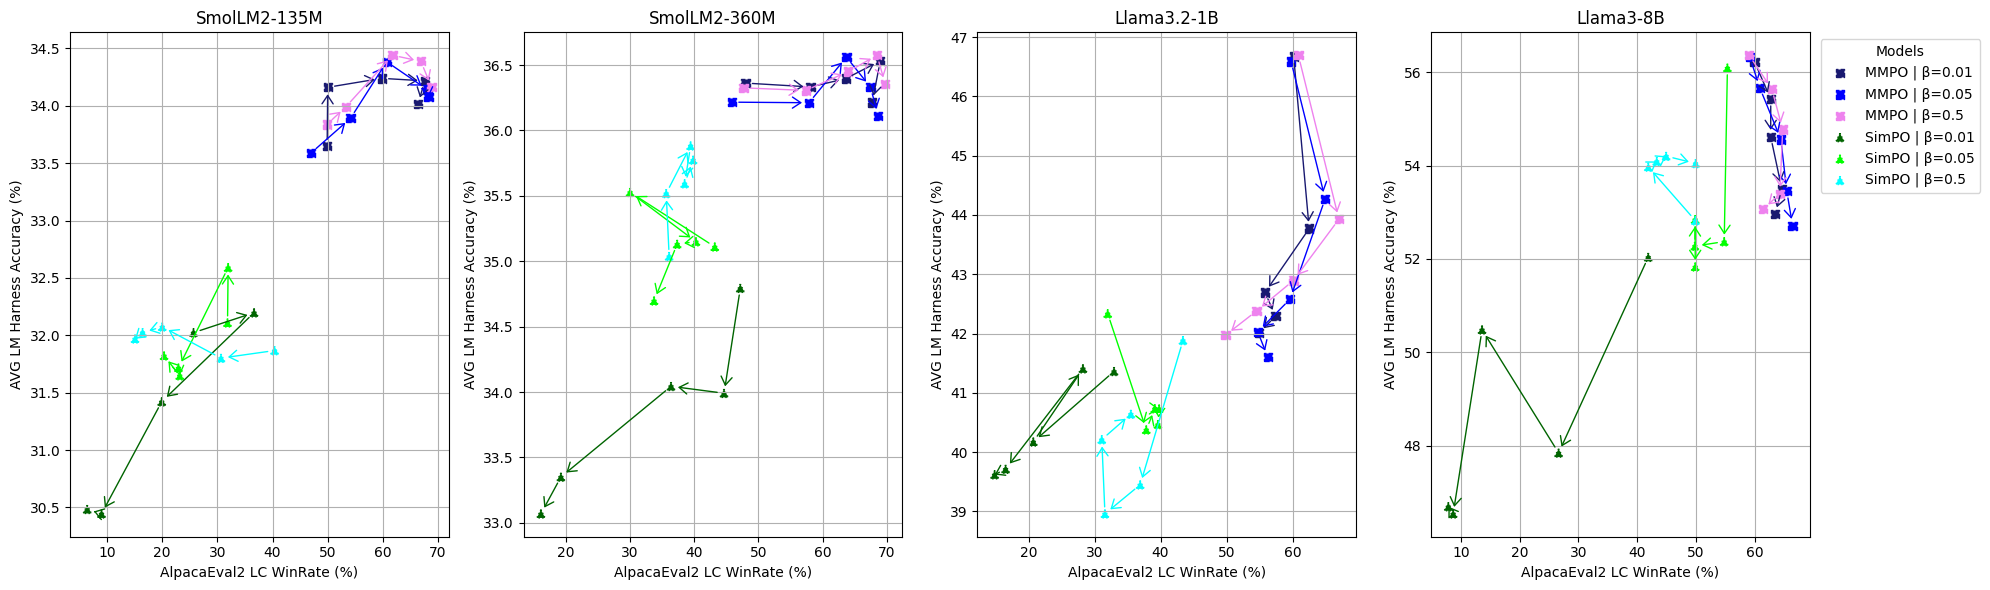

In [31]:
# Model names and markers
models = {
        # "sft": "o",           # Hexagon
        "mmpo=0.01": "s",     
        "mmpo=0.05": "s",
        "mmpo=0.5": "s",
        # "dpo=0.01": ".",        # Circle
        # "dpo=0.05": ".",        # Circle
        # "dpo=0.1": "P",       # Circle
        # "dpo=0.5": ".",         # Circle
        # "dpo-len": "s",       # Square
        "simpo=0.01": "^",    # Triangle Up
        "simpo=0.05": "^",    # Triangle Up
        # "simpo=0.1": "^",     # Triangle Up
        "simpo=0.5": "^",     # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len=0.05": "D", # Diamond
        # "mmpo-ent=0.05": "*", # Star
        # "mmpo-len-ent=0.05": "p", # Pentagon
}
file_name = "mmpo-simpo-results.png"
mmpo_plot_diagram(models, file_name)

In [53]:
def model_vars(model_str):
    if "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"mmpo-len=0.05": "brown",
"mmpo-ent=0.05": "red",
"mmpo-len-ent=0.05": "lightsalmon",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"sft": "green"
}

def mmpo_simpo_dpo_bubble_plot_diagram():
    # Model names and markers
    models = {
        # "sft": "o",           # Hexagon
        "mmpo=0.05": "s",          # Cross (filled)
        # "mmpo=0.05": "s",
        # "mmpo=0.1": "s",
        # "mmpo=0.5": "s",
        # "dpo=0.05": ".",         # Circle
        # "dpo=0.05": ".",         # Circle
        # "dpo=0.1": "P",          # Circle
        # "dpo=0.5": ".",          # Circle
        # "dpo-len": "s",       # Square
        # "simpo=0.05": "^",         # Triangle Up
        # "simpo=0.05": "^",         # Triangle Up
        # "simpo=0.1": "^",         # Triangle Up
        # "simpo=0.5": "^",         # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        "mmpo-len=0.05": "D",      # Diamond
        "mmpo-ent=0.05": "*",      # Star
        "mmpo-len-ent=0.05": "p",  # Pentagon

    }
    
    fig, axs = plt.subplots(1, 1, figsize=(8, 4))  # 2 rows, 1 column    
    # for model, marker in models.items():
    #     lm_harness_accuracies = []
    #     alpaca_winrates = []
    #     obj_type, len_norm, entp = model_vars(model)
    #     if model != "sft":  # Skip 135-sft as it does not have epochs
    #         for epoch in range(1, 6):  # Epochs 1 to 5
    #             beta = model.split("=")[1]
    #             key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
    #             if key in model_lm_harness_avg_scores_135m:
    #                 lm_harness_accuracies.append(model_lm_harness_avg_scores_135m[key])
    #                 alpaca_winrates.append(model_alpacaeval_winrates_135m[key])

    #     if "mmpo" in model.lower():
    #         model_label = f"MMPO | β={beta}"
    #         label = model_label
    #     elif "simpo" in model.lower():
    #         model_label = f"SimPO | β={beta}"
    #         label = model_label
    #     elif "dpo" in model.lower():
    #         model_label = f"DPO | β={beta}"
    #         label = model_label

    #     axs[0].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type],
    #         color=colors[model])

    #     for i in range(len(alpaca_winrates) - 1):
    #         start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
    #         end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
    #         axs[0].annotate(
    #             '',  # No text
    #             xy=end_point,
    #             xytext=start_point,
    #             arrowprops=dict(
    #                     arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
    #                     color=colors[model],
    #                     linewidth=1.0, # Thinner line
    #                     shrinkA=5, 
    #                     shrinkB=5
    #             ),
    #             xycoords='data'
    #         )
    
    # # Styling the plot
    # axs[0].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    # axs[0].set_ylabel(f'AVG LM Harness Accuracy (%)')
    # axs[0].set_title('SmolLM2-135M')
    # # axs[0].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    # axs[0].grid(True)
    

    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_360m:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_360m[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_360m[key])

        if "mmpo-len-ent" in model.lower():
            model_label = f"MMPO + LengthNorm + EntropyOptim | β={beta}"
            label = model_label
        elif "mmpo-len" in model.lower():
            model_label = f"MMPO + LengthNorm | β={beta}"
            label = model_label
        elif "mmpo-ent" in model.lower():
            model_label = f"MMPO + EntropyOptim | β={beta}"
            label = model_label
        elif "mmpo" in model.lower():
            model_label = f"MMPO | β={beta}"
            label = model_label
        elif "simpo" in model.lower():
            model_label = f"SimPO | β={beta}"
            label = model_label
        elif "dpo" in model.lower():
            model_label = f"DPO | β={beta}"
            label = model_label

        axs.scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs.annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )

    # Styling the plot
    axs.set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs.set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs.set_title('SmolLM2-360M')
    # axs[1].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs.grid(True)


    # for model, marker in models.items():
    #     lm_harness_accuracies = []
    #     alpaca_winrates = []
    #     obj_type, len_norm, entp = model_vars(model)
    #     if model != "sft":
    #         for epoch in range(1, 6):  # Epochs 1 to 5
    #             beta = model.split("=")[1]
    #             key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
    #             if key in model_lm_harness_avg_scores_llama_1b:
    #                 lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_1b[key])
    #                 alpaca_winrates.append(model_alpacaeval_winrates_llama31b[key])

    #     if "mmpo" in model.lower():
    #         model_label = f"MMPO | β={beta}"
    #         label = model_label
    #     elif "simpo" in model.lower():
    #         model_label = f"SimPO | β={beta}"
    #         label = model_label
    #     elif "dpo" in model.lower():
    #         model_label = f"DPO | β={beta}"
    #         label = model_label

    #     axs[2].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type],
    #         color=colors[model])

        
    #     for i in range(len(alpaca_winrates) - 1):
    #         start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
    #         end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
    #         axs[2].annotate(
    #             '',  # No text
    #             xy=end_point,
    #             xytext=start_point,
    #             arrowprops=dict(
    #                     arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
    #                     color=colors[model],
    #                     linewidth=1.0, # Thinner line
    #                     shrinkA=5, 
    #                     shrinkB=5
    #             ),
    #             xycoords='data'
    #         )
    
    
    # # Styling the plot
    # axs[2].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    # axs[2].set_ylabel(f'AVG LM Harness Accuracy (%)')
    # axs[2].set_title('Llama3.2-1B')
    # # axs[2].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    # axs[2].grid(True)

    # for model, marker in models.items():
    #     lm_harness_accuracies = []
    #     alpaca_winrates = []
    #     obj_type, len_norm, entp = model_vars(model)
    #     if model != "sft":
    #         for epoch in range(1, 6):  # Epochs 1 to 5
    #             beta = model.split("=")[1]
    #             key = f"llama3_8b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
    #             if key in model_lm_harness_avg_scores_llama_8b:
    #                 lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_8b[key])
    #                 alpaca_winrates.append(model_alpacaeval_winrates_llama38b[key])


    #     if "mmpo" in model.lower():
    #         model_label = f"MMPO | β={beta}"
    #         label = model_label
    #     elif "simpo" in model.lower():
    #         model_label = f"SimPO | β={beta}"
    #         label = model_label
    #     elif "dpo" in model.lower():
    #         model_label = f"DPO | β={beta}"
    #         label = model_label

    #     axs[3].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=label, linestyle=line_styles[obj_type],
    #         color=colors[model])

    #     for i in range(len(alpaca_winrates) - 1):
    #         start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
    #         end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
    #         axs[3].annotate(
    #             '',  # No text
    #             xy=end_point,
    #             xytext=start_point,
    #             arrowprops=dict(
    #                     arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
    #                     color=colors[model],
    #                     linewidth=1.0, # Thinner line
    #                     shrinkA=5, 
    #                     shrinkB=5
    #             ),
    #             xycoords='data'
    #         )

    # # Styling the plot
    # axs[3].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    # axs[3].set_ylabel(f'AVG LM Harness Accuracy (%)')
    # axs[3].set_title('Llama3-8B')
    # # axs[3].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    # axs[3].grid(True)

    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"mmpo-ablation-bubble-results.png", dpi=300)
    plt.show()

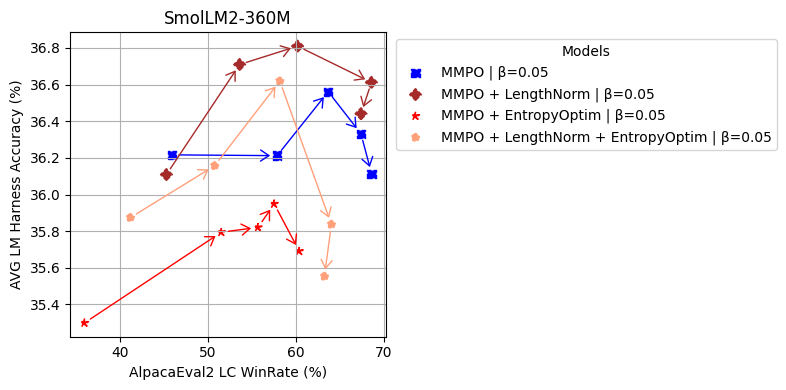

In [54]:
mmpo_simpo_dpo_bubble_plot_diagram()